In [1]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from random import choices
from glob import glob
import xarray as xr
import datetime as dt

## This notebook explores the Gaussian Plume dispersion model along with a simple inverse example that assumes *in situ* observations at the surface.

### Author: Sean Crowell
### Date: XXX
### Purpose: SSIM-GHG 2025

### Gaussian Plume solution with constant eddy diffusivity 

In [112]:
def gaus_plume(emis_rate=None,advect_wind=None,sig_y=None,sig_z=None,coords=None):
    x,y,z,H = coords[:]
    dq = emis_rate/(4*np.pi*advect_wind*sig_y*sig_z)
    dq *= np.exp(-y**2/sig_y**2)
    dq *= np.exp(-(z+H)**2/sig_z**2) + np.exp(-(z-H)**2/sig_z**2)
    return dq

/var/folders/rs/19n1gwk93bx64vmlp3fgdy_h0000gn/T/ipykernel_14156/811571155.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  dq = emis_rate/(4*np.pi*advect_wind*sig_y*sig_z)
/var/folders/rs/19n1gwk93bx64vmlp3fgdy_h0000gn/T/ipykernel_14156/811571155.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  dq *= np.exp(-y**2/sig_y**2)
/var/folders/rs/19n1gwk93bx64vmlp3fgdy_h0000gn/T/ipykernel_14156/811571155.py:4: RuntimeWarning: invalid value encountered in scalar multiply
  dq *= np.exp(-y**2/sig_y**2)
/var/folders/rs/19n1gwk93bx64vmlp3fgdy_h0000gn/T/ipykernel_14156/811571155.py:5: RuntimeWarning: invalid value encountered in scalar divide
  dq *= np.exp(-(z+H)**2/sig_z**2) + np.exp(-(z-H)**2/sig_z**2)
/var/folders/rs/19n1gwk93bx64vmlp3fgdy_h0000gn/T/ipykernel_14156/811571155.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  dq *= np.exp(-(z+H)**2/sig_z**2) + np.exp(-(z-H)**2/sig_z**2)


(0.0, 1.0)

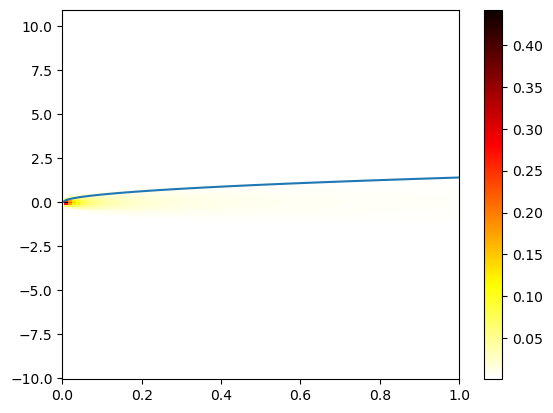

In [114]:
Q = 1000/60/60 #kg/s
u = 5 #m/s
k = 5 #m^2/s
H = 0
x = np.arange(0,11,0.01)
sig_y = np.sqrt(2*k/u*x)
sig_z = np.sqrt(2*k/u*x)
y = np.arange(-10,11,0.5)
z = np.arange(np.max((H-10,0)),H+11,1)
dq = np.zeros((z.shape[0],y.shape[0],x.shape[0]))
for iz,zz in enumerate(z):
    for iy,yy in enumerate(y):
        for ix,xx in enumerate(x):
            dq[iz,iy,ix] = gaus_plume(emis_rate=Q,advect_wind=u,sig_y=sig_y[ix],sig_z=sig_z[ix],coords=np.array([xx,yy,zz,H]))
plt.pcolormesh(x,y,dq[0],vmin=0.001,cmap=plt.cm.hot_r); plt.colorbar()
plt.plot(x,np.sqrt(2*k/u*x))
plt.gca().set_xlim([0,1])

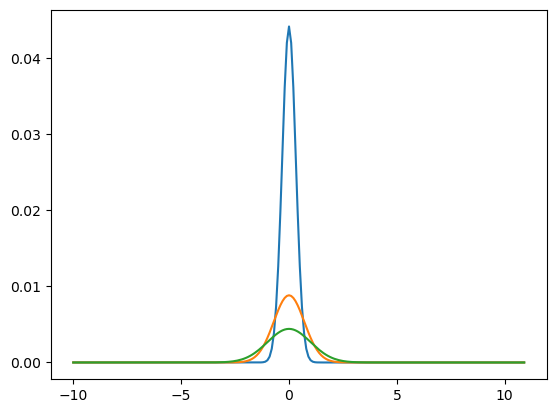

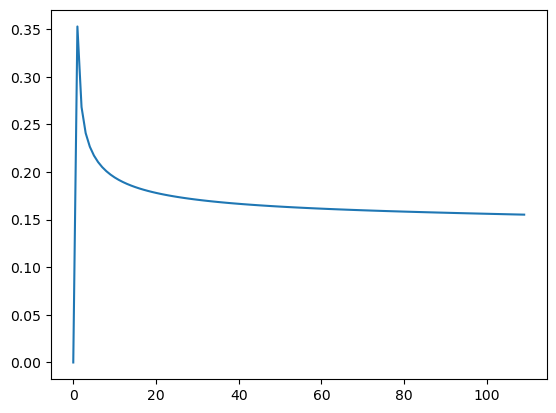

In [111]:
plt.plot(y,dq[0,:,1])
plt.plot(y,dq[0,:,5])
plt.plot(y,dq[0,:,10])

plt.figure()
plt.plot(dq[:,:,:].sum((0,1)))

In [8]:
dq[0]

array([[            inf, 1.59154943e+002, 7.95774715e+001,
        5.30516477e+001, 3.97887358e+001, 3.18309886e+001,
        2.65258238e+001, 2.27364204e+001, 1.98943679e+001,
        1.76838826e+001, 1.59154943e+001],
       [            inf, 1.13391155e-215, 5.66955776e-216,
        3.77970518e-216, 2.83477888e-216, 2.26782311e-216,
        1.88985259e-216, 1.61987365e-216, 1.41738944e-216,
        1.25990173e-216, 1.13391155e-216],
       [            nan, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [            nan, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [            nan, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
  